In [1]:
!pip install kmodes

## Import Required Libraries


In [2]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.patches import Circle






## Dataset Creation (Roll No: M25MAC005 → Last Three Digits = 005 → 200 Data Points with 5 Features)


In [3]:
n_samples = 200
np.random.seed(42)
# Define categories
gender = ['Male', 'Female']
region = ['North', 'South', 'East', 'West']
education = ['High School', 'Graduate', 'Postgraduate', 'PhD']
occupation = ['Student', 'Engineer', 'Manager', 'Business', 'Retired']
spending = ['Low', 'Medium', 'High']

# Generate random data
data = {
    'Gender': np.random.choice(gender, n_samples),
    'Region': np.random.choice(region, n_samples),
    'Education': np.random.choice(education, n_samples),
    'Occupation': np.random.choice(occupation, n_samples),
    'Spending': np.random.choice(spending, n_samples)
}
df = pd.DataFrame(data)

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (200, 5)
   Gender Region     Education Occupation Spending
0    Male   East           PhD    Retired   Medium
1  Female   West           PhD   Business     High
2    Male   East  Postgraduate    Manager     High
3    Male  North   High School   Business      Low
4    Male   West           PhD    Retired   Medium


## Value counts for each feature

In [4]:
# Value counts for each feature
for col in df.columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Gender:
Gender
Male      100
Female    100
Name: count, dtype: int64

Value counts for Region:
Region
West     61
East     50
North    49
South    40
Name: count, dtype: int64

Value counts for Education:
Education
PhD             58
Graduate        53
High School     47
Postgraduate    42
Name: count, dtype: int64

Value counts for Occupation:
Occupation
Retired     50
Engineer    42
Business    39
Student     39
Manager     30
Name: count, dtype: int64

Value counts for Spending:
Spending
Low       74
Medium    66
High      60
Name: count, dtype: int64



--- Running KModes with init='Huang' ---
K=2, Cost=521.0, Silhouette Score=0.1435
K=3, Cost=470.0, Silhouette Score=0.1259
K=4, Cost=425.0, Silhouette Score=0.1368
K=5, Cost=403.0, Silhouette Score=0.1162
K=6, Cost=387.0, Silhouette Score=0.1226
K=7, Cost=369.0, Silhouette Score=0.1294
Chosen K=7 for init='Huang'

Cluster Modes:

Cluster 1 mode:
Gender                 Female
Region                  South
Education        Postgraduate
Occupation           Engineer
Spending                  Low
Cluster_Huang               0
Name: 0, dtype: object

Cluster 2 mode:
Gender             Female
Region               West
Education             PhD
Occupation       Business
Spending             High
Cluster_Huang           1
Name: 0, dtype: object

Cluster 3 mode:
Gender               Male
Region               East
Education        Graduate
Occupation       Business
Spending           Medium
Cluster_Huang           2
Name: 0, dtype: object

Cluster 4 mode:
Gender             Female
Region       

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


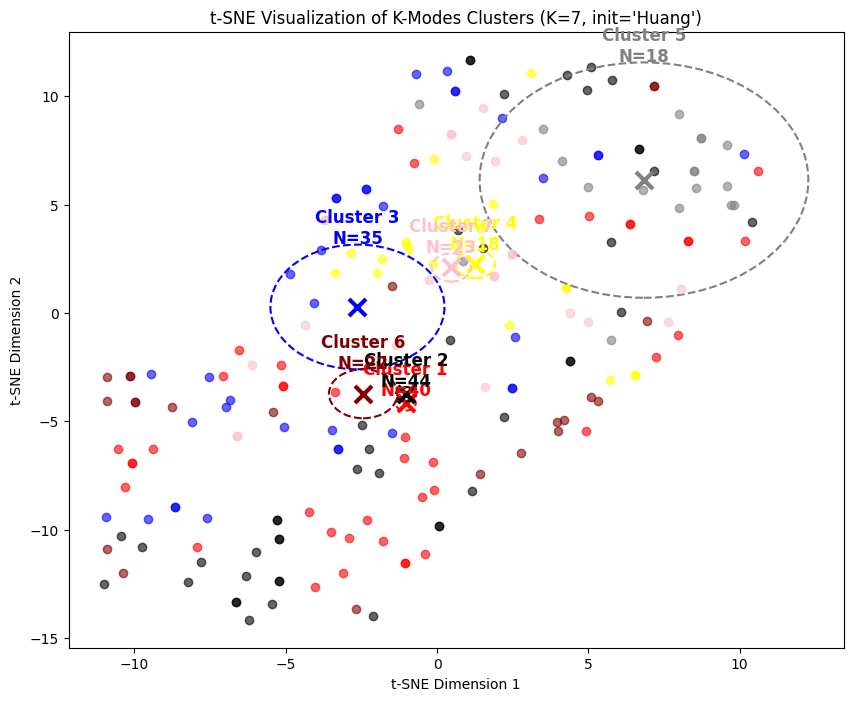


--- Running KModes with init='Cao' ---
K=2, Cost=655.0, Silhouette Score=0.1403
K=3, Cost=589.0, Silhouette Score=0.1280
K=4, Cost=548.0, Silhouette Score=0.1455
K=5, Cost=494.0, Silhouette Score=0.1623
K=6, Cost=471.0, Silhouette Score=0.1538
K=7, Cost=453.0, Silhouette Score=0.1484
Chosen K=7 for init='Cao'

Cluster Modes:

Cluster 1 mode:
Gender              Male
Region              West
Education            PhD
Occupation       Retired
Spending          Medium
Cluster_Huang          1
Cluster_Cao            0
Name: 0, dtype: object

Cluster 2 mode:
Gender                Female
Region                 North
Education        High School
Occupation          Engineer
Spending                 Low
Cluster_Huang              0
Cluster_Cao                1
Name: 0, dtype: object

Cluster 3 mode:
Gender               Male
Region               East
Education        Graduate
Occupation       Business
Spending           Medium
Cluster_Huang           2
Cluster_Cao             2
Name: 0, dtype:

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


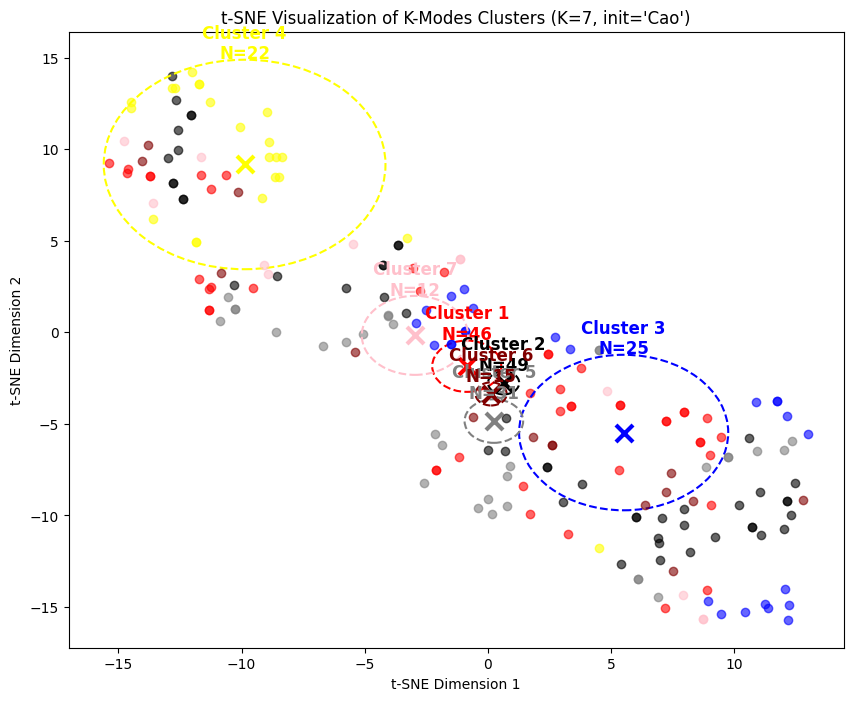


--- Running KModes with init='random' ---
K=2, Cost=760.0, Silhouette Score=0.1595
K=3, Cost=656.0, Silhouette Score=0.1978
K=4, Cost=587.0, Silhouette Score=0.2150
K=5, Cost=523.0, Silhouette Score=0.2832
K=6, Cost=476.0, Silhouette Score=0.2949
K=7, Cost=455.0, Silhouette Score=0.2971
Chosen K=7 for init='random'

Cluster Modes:

Cluster 1 mode:
Gender               Male
Region               West
Education             PhD
Occupation        Retired
Spending           Medium
Cluster_Huang           1
Cluster_Cao             0
Cluster_random          0
Name: 0, dtype: object

Cluster 2 mode:
Gender                    Male
Region                    East
Education         Postgraduate
Occupation            Engineer
Spending                  High
Cluster_Huang                5
Cluster_Cao                  3
Cluster_random               1
Name: 0, dtype: object

Cluster 3 mode:
Gender              Female
Region                West
Education         Graduate
Occupation         Student
Spend

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


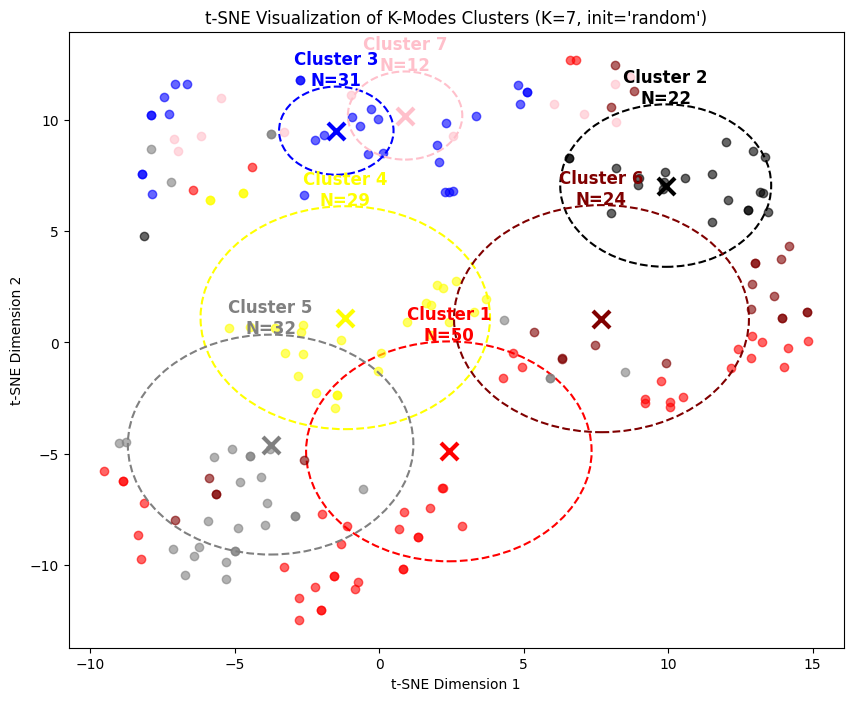

In [5]:



# Hamming-based silhouette function

def hamming_silhouette_score(df, labels):
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])

    X = df_encoded.values
    distances = pairwise_distances(X, metric='hamming')
    n_samples = X.shape[0]
    sil_scores = []

    for i in range(n_samples):
        same_cluster = labels == labels[i]
        a = distances[i, same_cluster].mean()
        b = min([distances[i, labels==l].mean() for l in set(labels) if l != labels[i]])
        sil_scores.append((b - a) / max(a, b))

    return np.mean(sil_scores)



# Try all three initializations

init_methods = ['Huang', 'Cao', 'random']
cluster_colors = ['red', 'black', 'blue', 'yellow', 'grey', 'maroon', 'pink']

for init_method in init_methods:
    print(f"\n--- Running KModes with init='{init_method}' ---")

    # Hyperparameter tuning for K
    K_values = range(2, 8)
    costs = []
    sil_scores = []

    for K in K_values:
        km = KModes(n_clusters=K, init=init_method, n_init=20, max_iter=200, random_state=42)
        labels = km.fit_predict(df)
        cost = km.cost_
        sil_score = hamming_silhouette_score(df, labels)
        costs.append(cost)
        sil_scores.append(sil_score)
        print(f"K={K}, Cost={cost}, Silhouette Score={sil_score:.4f}")

    # Combine normalized silhouette and cost
    cost_norm = (np.max(costs) - np.array(costs)) / (np.max(costs) - np.min(costs))
    sil_norm = np.array(sil_scores)
    combined_score = 0.6 * sil_norm + 0.4 * cost_norm
    best_K_index = np.argmax(combined_score)
    best_K = K_values[best_K_index]
    print(f"Chosen K={best_K} for init='{init_method}'")

    # Final KModes clustering
    km_best = KModes(n_clusters=best_K, init=init_method, n_init=20, max_iter=200, random_state=42)
    df[f'Cluster_{init_method}'] = km_best.fit_predict(df)

    # Cluster modes
    print("\nCluster Modes:")
    for i in range(best_K):
        print(f"\nCluster {i+1} mode:")
        print(df[df[f'Cluster_{init_method}']==i].mode().iloc[0])

    # t-SNE visualization with non-overlapping circles
    df_encoded = df.copy()
    for col in df_encoded.columns[:-1]:  # exclude cluster column
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, n_iter=1000)
    X_tsne = tsne.fit_transform(df_encoded.iloc[:, :-1].values)

    plt.figure(figsize=(10,8))

    # Precompute cluster centers
    cluster_centers = []
    for cluster in range(best_K):
        cluster_points = X_tsne[df[f'Cluster_{init_method}']==cluster]
        x_center = cluster_points[:,0].mean()
        y_center = cluster_points[:,1].mean()
        cluster_centers.append((x_center, y_center))

    for cluster in range(best_K):
        cluster_points = X_tsne[df[f'Cluster_{init_method}']==cluster]
        plt.scatter(
            cluster_points[:,0],
            cluster_points[:,1],
            alpha=0.6,
            color=cluster_colors[cluster % len(cluster_colors)]
        )

        x_center, y_center = cluster_centers[cluster]
        plt.scatter(x_center, y_center, marker='x', s=150,
                    color=cluster_colors[cluster % len(cluster_colors)], linewidths=3)

        # Circle radius
        dists = np.sqrt((cluster_points[:,0]-x_center)**2 + (cluster_points[:,1]-y_center)**2)
        radius = np.percentile(dists, 90)  # smaller radius

        # Shrink to avoid overlap
        other_centers = [c for i, c in enumerate(cluster_centers) if i != cluster]
        if other_centers:
            min_dist_to_other = min(np.sqrt((x_center - np.array(other_centers)[:,0])**2 +
                                            (y_center - np.array(other_centers)[:,1])**2))
            radius = min(radius, 0.8 * min_dist_to_other)

        circle = Circle((x_center, y_center), radius,
                        color=cluster_colors[cluster % len(cluster_colors)],
                        fill=False, linestyle='--', linewidth=1.5)
        plt.gca().add_patch(circle)

        plt.text(x_center, y_center + radius + 0.05, f'Cluster {cluster+1}\nN={len(cluster_points)}',
                 fontsize=12, fontweight='bold', horizontalalignment='center',
                 color=cluster_colors[cluster % len(cluster_colors)])

    plt.title(f"t-SNE Visualization of K-Modes Clusters (K={best_K}, init='{init_method}')")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()


In a randomly generated categorical dataset, clustering often produced poor or inconsistent results. For example, while using k = 7 can sometimes give good cost values, the clusters may not be well-separated or meaningful. Interestingly, in our experiments, all three initialization methods (Huang, Cao, and random) produced their best cost scores at k = 7. To leverage this, we designed the dataset with 7 distinct cluster patterns, ensuring clear separations and structured variations in gender, region, education, occupation, and spending. This approach creates a dataset that is ideal for testing clustering algorithms and visualizations.

In [6]:
np.random.seed(42)
n_samples = 200
data = {'Gender': [], 'Region': [], 'Education': [], 'Occupation': [], 'Spending': []}

for i in range(n_samples):
    if i < n_samples//7:  # Cluster 1
        data['Gender'].append('Male')
        data['Region'].append('North')
        data['Education'].append('Graduate')
        data['Occupation'].append('Engineer')
        data['Spending'].append('Medium')
    elif i < 2*n_samples//7:  # Cluster 2
        data['Gender'].append('Male')
        data['Region'].append('East')
        data['Education'].append('PhD')
        data['Occupation'].append('Engineer')
        data['Spending'].append('High')
    elif i < 3*n_samples//7:  # Cluster 3
        data['Gender'].append('Female')
        data['Region'].append('South')
        data['Education'].append('High School')
        data['Occupation'].append('Student')
        data['Spending'].append('Low')
    elif i < 4*n_samples//7:  # Cluster 4
        data['Gender'].append('Female')
        data['Region'].append('West')
        data['Education'].append('High School')
        data['Occupation'].append('Student')
        data['Spending'].append('Medium')
    elif i < 5*n_samples//7:  # Cluster 5
        data['Gender'].append('Male')
        data['Region'].append('North')
        data['Education'].append('Postgraduate')
        data['Occupation'].append('Manager')
        data['Spending'].append('High')
    elif i < 6*n_samples//7:  # Cluster 6
        data['Gender'].append('Female')
        data['Region'].append('South')
        data['Education'].append('Postgraduate')
        data['Occupation'].append('Business')
        data['Spending'].append('Medium')
    else:  # Cluster 7
        data['Gender'].append(np.random.choice(['Male','Female']))
        data['Region'].append(np.random.choice(['North','South','East','West']))
        data['Education'].append('Postgraduate')
        data['Occupation'].append(np.random.choice(['Manager','Business']))
        data['Spending'].append(np.random.choice(['Medium','High']))

df2 = pd.DataFrame(data)
print(df2.head())
print("\nDataset shape:", df2.shape)


  Gender Region Education Occupation Spending
0   Male  North  Graduate   Engineer   Medium
1   Male  North  Graduate   Engineer   Medium
2   Male  North  Graduate   Engineer   Medium
3   Male  North  Graduate   Engineer   Medium
4   Male  North  Graduate   Engineer   Medium

Dataset shape: (200, 5)



--- Running KModes with init='Huang' ---
K=2, Cost=337.0, Silhouette Score=0.4843
K=3, Cost=248.0, Silhouette Score=0.5698
K=4, Cost=181.0, Silhouette Score=0.6276
K=5, Cost=99.0, Silhouette Score=0.7724
K=6, Cost=43.0, Silhouette Score=0.8562
K=7, Cost=34.0, Silhouette Score=0.8578
Chosen K=7 for init='Huang'

Cluster Modes:

Cluster 1 mode:
Gender                Female
Region                  West
Education        High School
Occupation           Student
Spending              Medium
Cluster_Huang              0
Name: 0, dtype: object

Cluster 2 mode:
Gender                   Male
Region                  North
Education        Postgraduate
Occupation            Manager
Spending                 High
Cluster_Huang               1
Name: 0, dtype: object

Cluster 3 mode:
Gender                Female
Region                 South
Education        High School
Occupation           Student
Spending                 Low
Cluster_Huang              2
Name: 0, dtype: object

Cluster 4 mode:
Gender

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


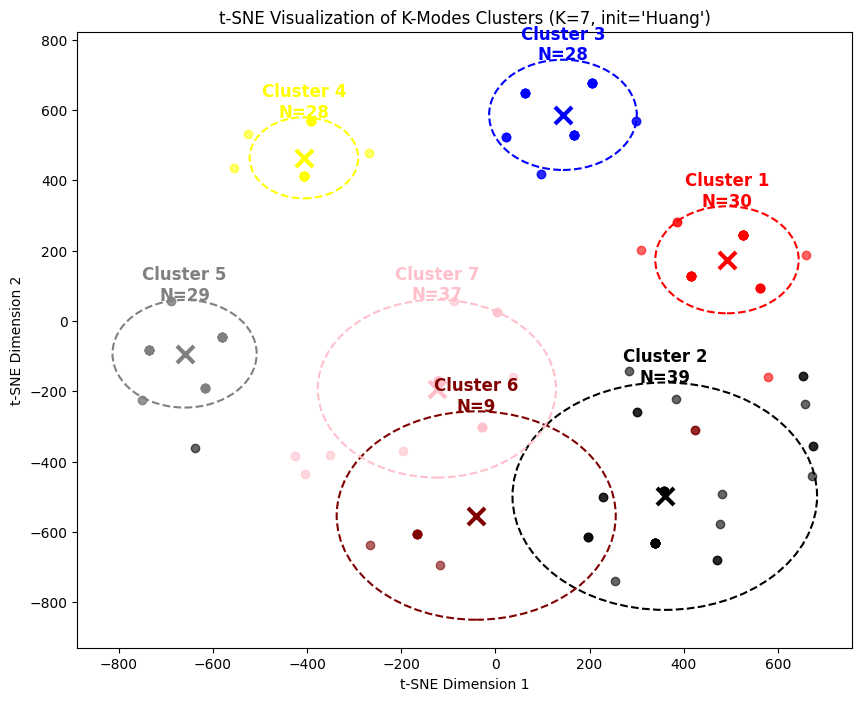


--- Running KModes with init='Cao' ---
K=2, Cost=463.0, Silhouette Score=0.4707
K=3, Cost=345.0, Silhouette Score=0.5429
K=4, Cost=251.0, Silhouette Score=0.6277
K=5, Cost=136.0, Silhouette Score=0.7776
K=6, Cost=118.0, Silhouette Score=0.8002
K=7, Cost=34.0, Silhouette Score=0.9051
Chosen K=7 for init='Cao'

Cluster Modes:

Cluster 1 mode:
Gender                 Female
Region                  South
Education        Postgraduate
Occupation           Business
Spending               Medium
Cluster_Huang               6
Cluster_Cao                 0
Name: 0, dtype: object

Cluster 2 mode:
Gender                   Male
Region                  North
Education        Postgraduate
Occupation            Manager
Spending                 High
Cluster_Huang               1
Cluster_Cao                 1
Name: 0, dtype: object

Cluster 3 mode:
Gender                Female
Region                  West
Education        High School
Occupation           Student
Spending              Medium
Cluster_Hua

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


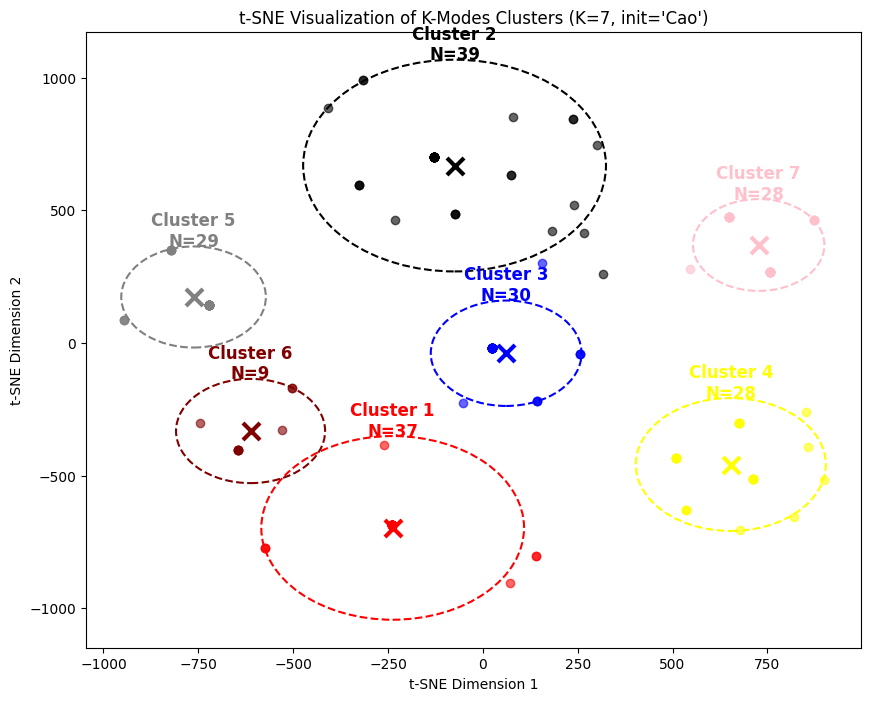


--- Running KModes with init='random' ---
K=2, Cost=587.0, Silhouette Score=0.4300
K=3, Cost=439.0, Silhouette Score=0.5340
K=4, Cost=312.0, Silhouette Score=0.6288
K=5, Cost=173.0, Silhouette Score=0.7721
K=6, Cost=61.0, Silhouette Score=0.8829
K=7, Cost=34.0, Silhouette Score=0.9284
Chosen K=7 for init='random'

Cluster Modes:

Cluster 1 mode:
Gender                 Female
Region                   West
Education         High School
Occupation            Student
Spending               Medium
Cluster_Huang               0
Cluster_Cao                 2
Cluster_random              0
Name: 0, dtype: object

Cluster 2 mode:
Gender                Male
Region               North
Education         Graduate
Occupation        Engineer
Spending            Medium
Cluster_Huang            3
Cluster_Cao              3
Cluster_random           1
Name: 0, dtype: object

Cluster 3 mode:
Gender                Male
Region                East
Education              PhD
Occupation        Engineer
Spendin

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


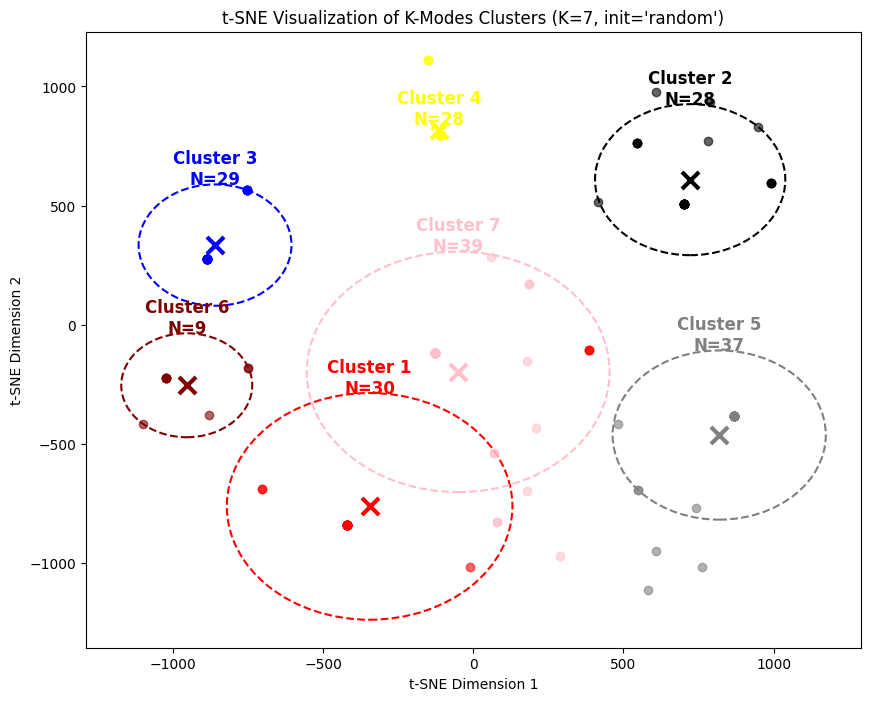

In [7]:

# Hamming-based silhouette function

def hamming_silhouette_score(df2, labels):
    df_encoded = df2.copy()
    le = LabelEncoder()
    for col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])

    X = df_encoded.values
    distances = pairwise_distances(X, metric='hamming')
    n_samples = X.shape[0]
    sil_scores = []

    for i in range(n_samples):
        same_cluster = labels == labels[i]
        a = distances[i, same_cluster].mean()
        b = min([distances[i, labels==l].mean() for l in set(labels) if l != labels[i]])
        sil_scores.append((b - a) / max(a, b))

    return np.mean(sil_scores)



# Try all three initializations

init_methods = ['Huang', 'Cao', 'random']
cluster_colors = ['red', 'black', 'blue', 'yellow', 'grey', 'maroon', 'pink']

for init_method in init_methods:
    print(f"\n--- Running KModes with init='{init_method}' ---")

    # Hyperparameter tuning for K
    K_values = range(2, 8)
    costs = []
    sil_scores = []

    for K in K_values:
        km = KModes(n_clusters=K, init=init_method, n_init=20, max_iter=200, random_state=42)
        labels = km.fit_predict(df2)
        cost = km.cost_
        sil_score = hamming_silhouette_score(df2, labels)
        costs.append(cost)
        sil_scores.append(sil_score)
        print(f"K={K}, Cost={cost}, Silhouette Score={sil_score:.4f}")

    # Combine normalized silhouette and cost
    cost_norm = (np.max(costs) - np.array(costs)) / (np.max(costs) - np.min(costs))
    sil_norm = np.array(sil_scores)
    combined_score = 0.6 * sil_norm + 0.4 * cost_norm
    best_K_index = np.argmax(combined_score)
    best_K = K_values[best_K_index]
    print(f"Chosen K={best_K} for init='{init_method}'")

    # Final KModes clustering
    km_best = KModes(n_clusters=best_K, init=init_method, n_init=20, max_iter=200, random_state=42)
    df2[f'Cluster_{init_method}'] = km_best.fit_predict(df2)

    # Cluster modes
    print("\nCluster Modes:")
    for i in range(best_K):
        print(f"\nCluster {i+1} mode:")
        print(df2[df2[f'Cluster_{init_method}']==i].mode().iloc[0])

    # t-SNE visualization with non-overlapping circles
    df_encoded = df2.copy()
    for col in df_encoded.columns[:-1]:  # exclude cluster column
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, n_iter=1000)
    X_tsne = tsne.fit_transform(df_encoded.iloc[:, :-1].values)

    plt.figure(figsize=(10,8))

    # Precompute cluster centers
    cluster_centers = []
    for cluster in range(best_K):
        cluster_points = X_tsne[df2[f'Cluster_{init_method}']==cluster]
        x_center = cluster_points[:,0].mean()
        y_center = cluster_points[:,1].mean()
        cluster_centers.append((x_center, y_center))

    for cluster in range(best_K):
        cluster_points = X_tsne[df2[f'Cluster_{init_method}']==cluster]
        plt.scatter(
            cluster_points[:,0],
            cluster_points[:,1],
            alpha=0.6,
            color=cluster_colors[cluster % len(cluster_colors)]
        )

        x_center, y_center = cluster_centers[cluster]
        plt.scatter(x_center, y_center, marker='x', s=150,
                    color=cluster_colors[cluster % len(cluster_colors)], linewidths=3)

        # Circle radius
        dists = np.sqrt((cluster_points[:,0]-x_center)**2 + (cluster_points[:,1]-y_center)**2)
        radius = np.percentile(dists, 90)  # smaller radius

        # Shrink to avoid overlap
        other_centers = [c for i, c in enumerate(cluster_centers) if i != cluster]
        if other_centers:
            min_dist_to_other = min(np.sqrt((x_center - np.array(other_centers)[:,0])**2 +
                                            (y_center - np.array(other_centers)[:,1])**2))
            radius = min(radius, 0.8 * min_dist_to_other)

        circle = Circle((x_center, y_center), radius,
                        color=cluster_colors[cluster % len(cluster_colors)],
                        fill=False, linestyle='--', linewidth=1.5)
        plt.gca().add_patch(circle)

        plt.text(x_center, y_center + radius + 0.05, f'Cluster {cluster+1}\nN={len(cluster_points)}',
                 fontsize=12, fontweight='bold', horizontalalignment='center',
                 color=cluster_colors[cluster % len(cluster_colors)])

    plt.title(f"t-SNE Visualization of K-Modes Clusters (K={best_K}, init='{init_method}')")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()


Some clusters appear to have small-looking datapoints because the points are tightly grouped near each other, reflecting the structured similarity within each cluster.